# Face Detection with Haar Cascades

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# CONVERTING TO GRAYSCALE

In [12]:
w_glass = cv2.imread('image_01.png', cv2.IMREAD_GRAYSCALE)
wo_glass = cv2.imread('image_02.png', cv2.IMREAD_GRAYSCALE)
group = cv2.imread('image_03.png', cv2.IMREAD_GRAYSCALE)

In [13]:
w_glass1 = cv2.resize(w_glass, (1000, 1000))
wo_glass1 = cv2.resize(wo_glass, (1000, 1000)) 
group1 = cv2.resize(group, (1000, 1000))

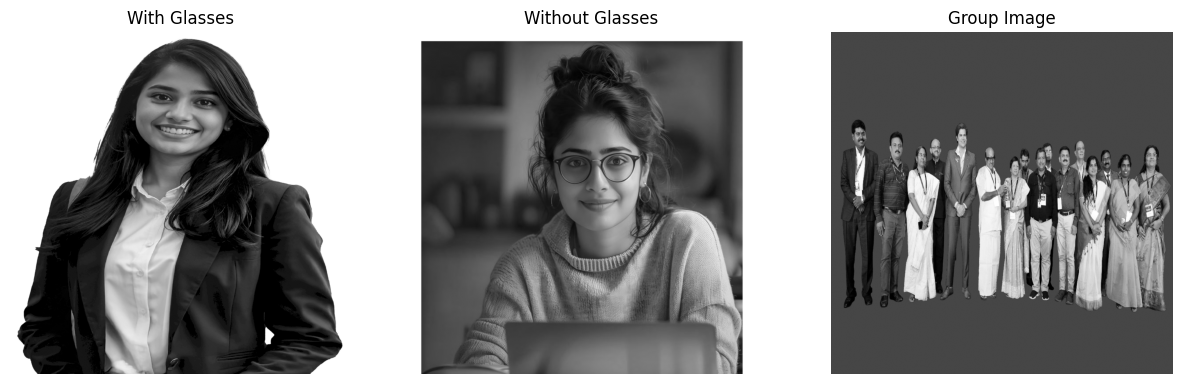

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1);plt.imshow(w_glass1,cmap='gray');plt.title('With Glasses');plt.axis('off')
plt.subplot(1,3,2);plt.imshow(wo_glass1,cmap='gray');plt.title('Without Glasses');plt.axis('off')
plt.subplot(1,3,3);plt.imshow(group1,cmap='gray');plt.title('Group Image');plt.axis('off')
plt.show()

# FACE DETECTION

In [15]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
def detect_and_display(image):
    faces = face_cascade.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5)
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 10)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

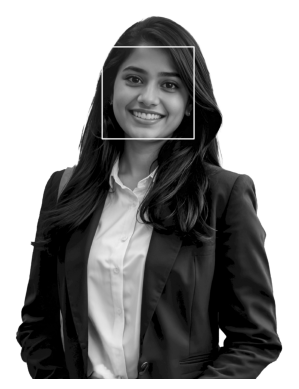

In [16]:
result = detect_and_display(w_glass)

In [17]:
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
def detect_eyes(image):
    face_img = image.copy()
    eyes = eye_cascade.detectMultiScale(face_img)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(face_img, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
    return face_img
w_glass = detect_eyes(w_glass)
wo_glass = detect_eyes(wo_glass)
group = detect_eyes(group)

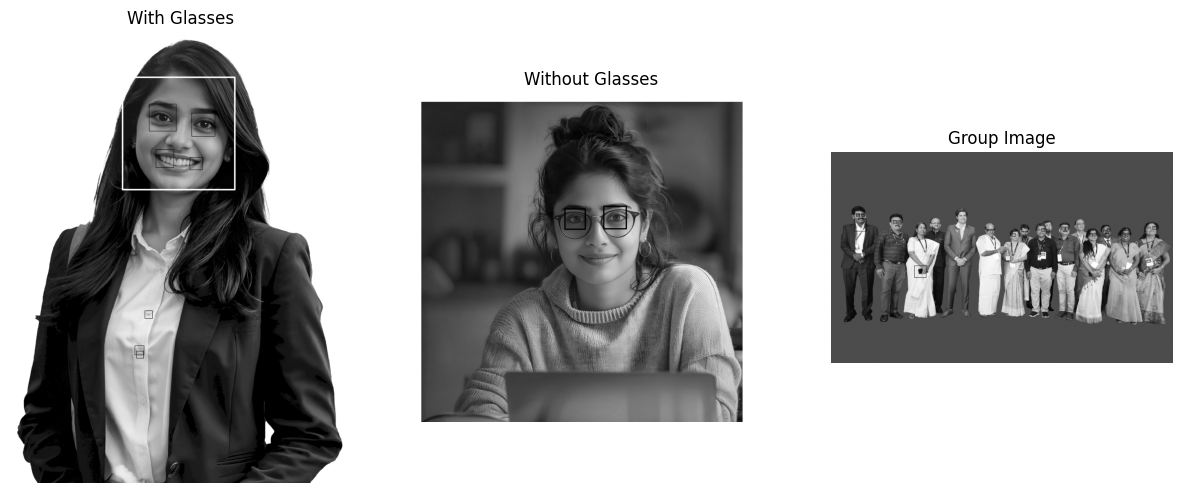

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1);plt.imshow(w_glass,cmap='gray');plt.title('With Glasses');plt.axis('off')
plt.subplot(1,3,2);plt.imshow(wo_glass,cmap='gray');plt.title('Without Glasses');plt.axis('off')
plt.subplot(1,3,3);plt.imshow(group,cmap='gray');plt.title('Group Image');plt.axis('off')
plt.show()

# DETECTING THE CAPTURED FACE

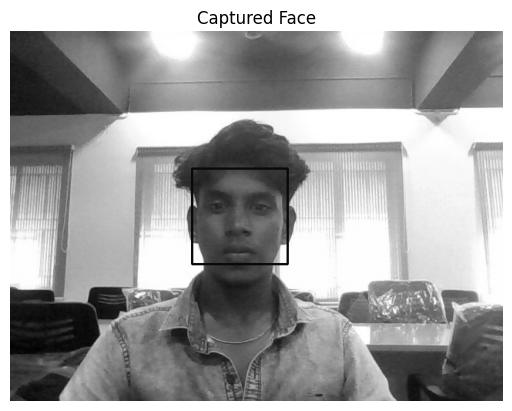

In [19]:
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
    cv2.imshow('Video Face Detection', frame)

    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'): 
        break
    elif key == ord('s'): 
        cv2.imwrite('captured_face.png', frame)
        break
cap.release()
cv2.destroyAllWindows()
captured_image = cv2.imread('captured_face.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(captured_image, cmap='gray')
plt.title('Captured Face')
plt.axis('off')
plt.show()

# Captured Face Eye

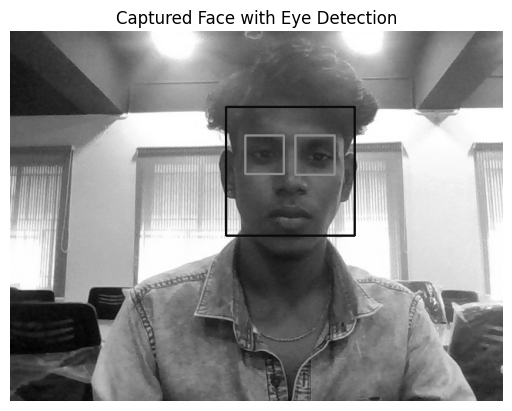

In [21]:
def new_detect(gray, frame):
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
    return frame


video_capture = cv2.VideoCapture(0)
while True:
    ret, frame = video_capture.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    canvas = new_detect(gray, frame)

    cv2.imshow('Video - Face & Eye Detection', canvas)

    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break
    elif key == ord('s'):
        cv2.imwrite('captured_face_eye.png', frame)
        break
video_capture.release()
cv2.destroyAllWindows()
captured_image = cv2.imread('captured_face_eye.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(captured_image, cmap='gray')
plt.title('Captured Face with Eye Detection')
plt.axis('off')
plt.show()